<a href="https://colab.research.google.com/github/gmehra123/course1/blob/master/Supervised_Learning_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regression 
* Target variable has continous values.
* sklearn.linear_model import LinearRegression
* Refer to statsmodels notes for Linear regression theory
* Using a single explanatory variable is called simple regression
  * y=ax+b is the equation for simple linear regression
* Evaluating the fit of a regression involving calculating the RSS or residual sum of squares. We square so that offsetting errors dont cancel out
* For 2 explanatory features the model looks like
  * y=a1x1+a2x2+b
  * Here there are 3 model paramenters a1,a2,b


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
sugar=pd.read_csv('https://assets.datacamp.com/production/repositories/5981/datasets/3d7b5bbdc7e91636cb1f9b62d9ca2a3959ce8aab/diabetes_clean.csv')

In [4]:
sugar.sample(5)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
57,0,100,88,60,110,46.8,0.962,31,0
299,8,112,72,0,0,23.6,0.840,58,0
609,1,111,62,13,182,24.0,0.138,23,0
157,1,109,56,21,135,25.2,0.833,23,0
748,3,187,70,22,200,36.4,0.408,36,1


### Simple Linear Regression

In [9]:
y=sugar.glucose
X=sugar.bmi.values.reshape(-1,1)

In [10]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [11]:
predictions=reg.predict(X)

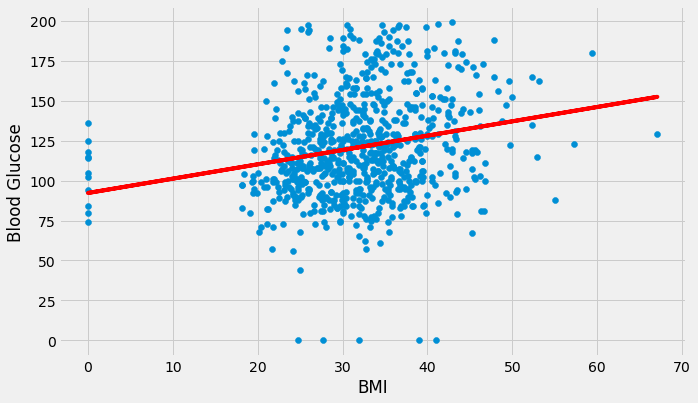

In [19]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(10)
ax.scatter(x=X,y=y)
ax.set_xlabel('BMI')
ax.set_ylabel('Blood Glucose')
ax.plot(X,predictions,color='red')
plt.show()

### Multiple Linear Regression

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [36]:
X=sugar.drop(columns='glucose')
y=sugar.glucose
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [37]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [38]:
pred=reg.predict(X_test)
reg.score(X_test,y_test)

0.2828046881037515

In [42]:
from sklearn.metrics import mean_squared_error
y_pred=reg.predict(X_test)
mean_squared_error(y_pred,y_test,squared=False)

26.34145958223226

### Cross Validation
* R2 that we see on test data is dependent on the way we split the train,test data.
* A different train test split will give a potentially different R2.
* Cross validation involves
  * Splitting the data into 5/n folds
  * Fitting the data on 4 folds and predicting on the 5 fold and computing the metric of interest
  * Repeat the process and calcuate the metric of interest.
  * You end up with 5 values of R2 and you can take the average.

In [44]:
from sklearn.model_selection import KFold,cross_val_score
reg=LinearRegression()
kf=KFold(n_splits=6,shuffle=True,random_state=123)
cv_scores=cross_val_score(reg,X,y,cv=kf)

In [46]:
np.mean(cv_scores)

0.32082070276301294

### Regularization
* Very large coeffecients for slope and intercept can lead to overfitting
* Loss function is altered to adjust coeffecients
  * Ridge Regularization OLS loss function + squared value of each coeff * const. This penalizes the model for coeffs that are too large. We need to pick the constant value in ridge. The Alpha parameter controls for large coeffecients. *alpha=0* means *ordinary least squares (OLS)* regression. This is similar to choosing *k* in *knn*.
  * Another type of regularization is *lasso*. Uses the absolute value of the coeffecients multiplied by a constant alpha. Lasso takes the coeffecients of the least important features to 0

In [48]:
from sklearn.linear_model import Ridge
alphas=[0.1,1,10,100,1000]
scores=[]
for alpha in alphas:
  ridge=Ridge(alpha=alpha)
  ridge.fit(X_train,y_train)
  scores.append(ridge.score(X_test,y_test))

In [49]:
scores

[0.28284666232222233,
 0.28320633574804754,
 0.2853000732200006,
 0.26423984812668133,
 0.19292424694100963]

<BarContainer object of 8 artists>

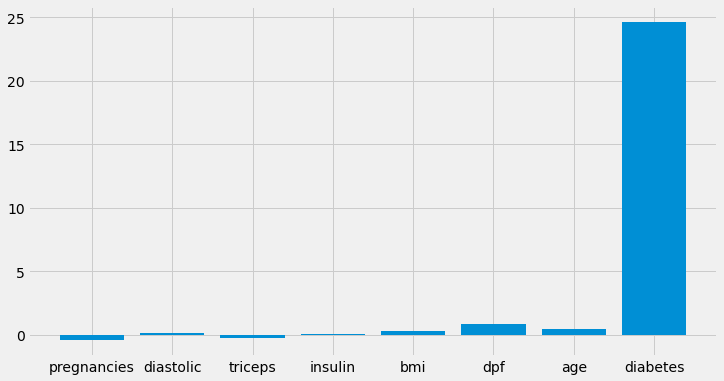

In [61]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
coeff=lasso.fit(X,y).coef_
names=X.columns
fig,ax=plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(11)
ax.bar(x=names,height=coeff)